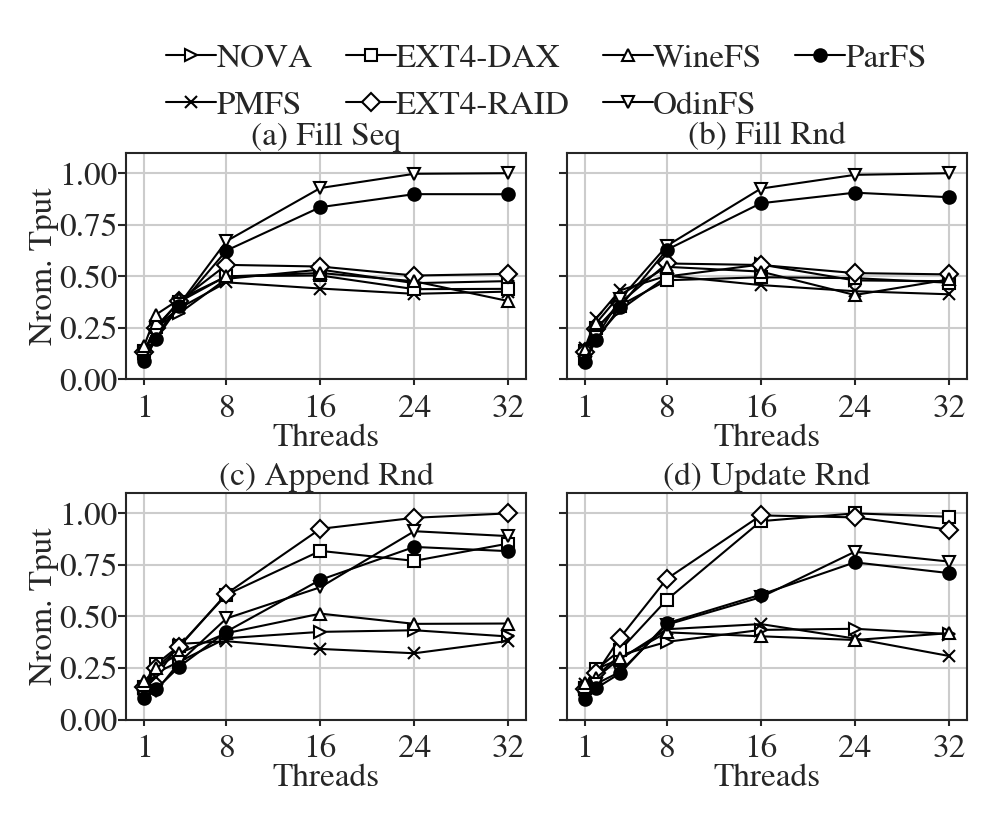

In [4]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-v0_8-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
plt.rcParams["font.size"] = 8
pd.options.display.max_columns = None
pd.options.display.max_rows = None

with open("./performance-comparison-table-store", "r") as f:
    df = pd.read_csv(f, index_col=None, engine='python', sep=' ')
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(6)))

colors = ['white', 'white', 'white', 'white', 'white', 'white', 'black']
marks = [">", "x", "s", "D", "^", "v", "o"]
workloads = ["fill_seq(MB/s)", "fillrandom(MB/s)", "appendrandom(MB/s)", "updaterandom(MB/s)"]
titles = ["(a) Fill Seq", "(b) Fill Rnd", "(c) Append Rnd", "(d) Update Rnd"]
fss = ["nova", "pmfs", "ext4-dax", "ext4-raid", "winefs", "odinfs-12", "parfs-12"]
num_jobs = [1, 2, 4, 8, 16, 24, 32]
x = list(num_jobs) 

mapping = {
    "nova":"NOVA",
    "pmfs":"PMFS",
    "ext4-dax":"EXT4-DAX",
    "ext4-raid":"EXT4-RAID",
    "winefs":"WineFS",
    "odinfs-12":"OdinFS",
    "parfs-12":"ParFS",
}
mapped_fss = [mapping.get(item, item) for item in fss]

for workload in workloads:
    value = df[workload] / df[workload].max()
    df[workload] = value

lines = []
for i in range(4):
    plt.subplot(2, 2, i + 1)
    workload = workloads[i]
    for idx, fs in enumerate(fss):
        y = df[(df['fs'] == fs)][workload].iloc[:len(num_jobs)]
        p, = plt.plot(x, y, color="black", markerfacecolor=colors[idx], linewidth=0.5,label=fs, marker=marks[idx], markeredgecolor="black", markersize=3, markeredgewidth=0.5)
        plt.scatter(x, y, color=colors[idx], s=0.3)
        lines.append(p)

    xlabelpad = -0.01
    ytick = [0, 0.25, 0.5, 0.75, 1]
    if i == 0 or i == 2:
        plt.yticks(ytick)
        plt.ylabel('Nrom. Tput', labelpad=xlabelpad)
    else:
        plt.yticks(ytick, labels=[])


    plt.ylim(0, 1.1)
    plt.xlabel("Threads", labelpad=xlabelpad) 
    plt.title(titles[i], pad=2, fontsize=8)

    plt.tick_params(axis='y', pad=0, width=1)
    plt.tick_params(axis='x', pad=2, width=2)

    ax = plt.gca()
    ax.tick_params(axis='y', which='major', length=1, width = 0.5, direction='out', right=False, left=True)
    ax.tick_params(axis='x', which='major', length=1.5, width = 0.5, direction='out', top=False, bottom=True)
    ax.yaxis.set_tick_params(which='major', size=2)

    plt.xticks([1, 8, 16, 24, 32], labels=[1, 8, 16, 24, 32])
    ax = plt.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)

fig.legend(lines, mapped_fss, loc='center', bbox_to_anchor=(0.5, 1), ncol=4, columnspacing=1, handletextpad=0, handlelength=1.5, frameon=False)

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, hspace=0.5, wspace=0.1)

plt.savefig("./Rocksdb.pdf", bbox_inches='tight', pad_inches=0)